# SNPs
On this notebook, I am going to analyze the difference between distribution of different annotations between a good and a bad vcf. First thing, is to load all dependencies:

In [914]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.mlab as mlab
import pandas as pd
import pylab

%matplotlib inline

snps_folder="/Users/ernesto/projects/IGSR/11_04_17/LCOVERAGE/SNPS/"

## QUAL
Quality assigned by SAMtools to each of the SNPs

We read-in the data:

In [915]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/quals.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/quals.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [916]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 990.996420507
Avg Bad set: 976.472252573


### t-test

First, we check if variances are equal:

In [917]:
print(np.var(good_set))
print(np.var(bad_set))

6110.26047924
16403.4648373


And we perform the homogeinity of variances test:

In [918]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 414.611936215
P-value: 5.99242771265e-92


Variances are not equal, we set the t-test accordingly:

In [919]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False) 

Ttest_indResult(statistic=16.943695481466143, pvalue=3.8951204230994369e-64)

### Check for normality

In [920]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 94360.9181216
P-value: 0.0


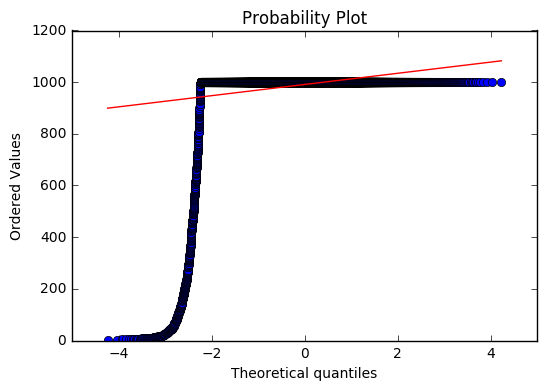

In [921]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

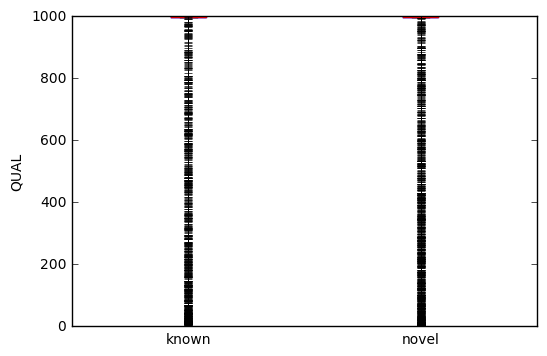

In [922]:
data=[good_set,bad_set]

plt.boxplot(data,labels=['known','novel'])

plt.ylabel('QUAL')

### Plots
Now, we check the distribution of known and novel with a histogram

<function matplotlib.pyplot.show>

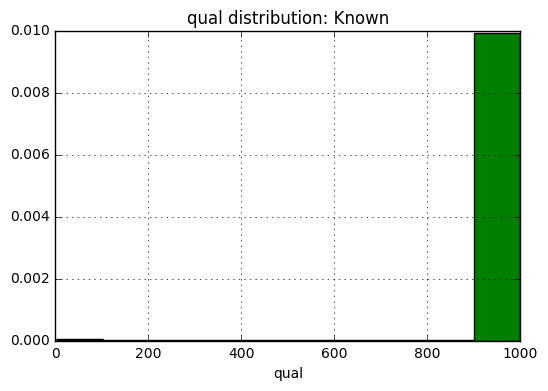

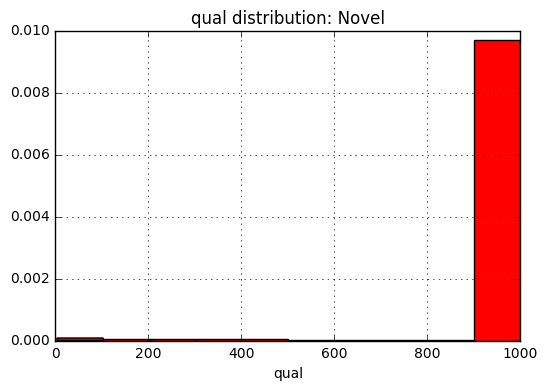

In [923]:
# plot normed histogram
plt.figure(1)          
plt.hist(good_set, normed=True,facecolor='green')
plt.xlabel('qual')
plt.title('qual distribution: Known')
plt.grid(True)

plt.figure(2)   
plt.hist(bad_set, normed=True,facecolor='red')
plt.xlabel('qual')
plt.title('qual distribution: Novel')
plt.grid(True)
plt.show

We see a huge peak of SNPs having a quality of 999.
Let's adjust the range for not displaying this big peak

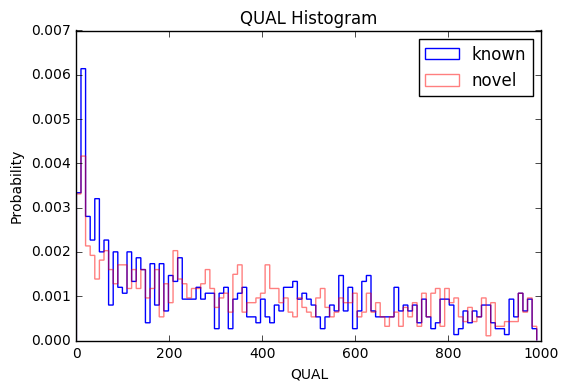

In [924]:
plt.hist(good_set, bins=100, histtype='step', normed=True, color='b', label='known',range=[0,990])
plt.hist(bad_set, bins=100, histtype='step', normed=True, color='r', alpha=0.5, label='novel',range=[0,990])
plt.title("QUAL Histogram")
plt.xlabel("QUAL")
plt.ylabel("Probability")
plt.legend()
plt.show()



### Conclusion
No apparent differences in the quality distribution between known/novel. This annotation will not be used in the filtering

## DP
Info FIELD. Raw read depth

We read-in the data:

In [925]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/DP.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/DP.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [926]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 18890.3644502
Avg Bad set: 36561.5258973


### t-test

First, we check if variances are equal:

In [927]:
print(np.var(good_set))
print(np.var(bad_set))

7765149.93856
2315821299.37


And we perform the homogeinity of variances test:

In [928]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 8649.48872776
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [929]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False) 

Ttest_indResult(statistic=-59.064184273418725, pvalue=0.0)

### Check for normality

In [930]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 6640.73680078
P-value: 0.0


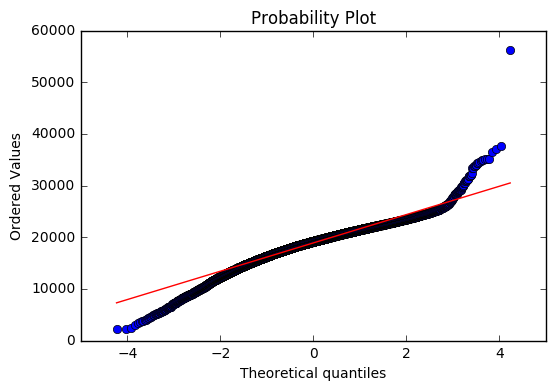

In [931]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

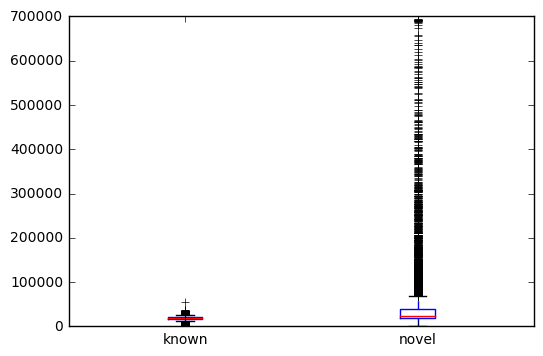

In [932]:
data=[good_set,bad_set]

bplot=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

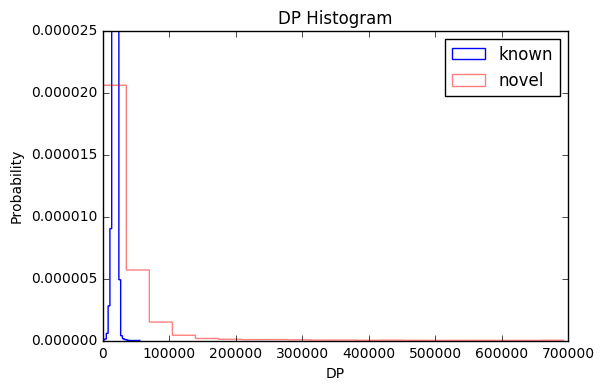

In [933]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("DP Histogram")
plt.xlabel("DP")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
Let's take the 99 percentile in the known set as the cutoff:

In [934]:
cutoff=np.percentile(good_set,99)
print(cutoff)

24304.2


## MQ

RMS Mapping Quality

We read-in the data:

In [935]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/MQ.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/MQ.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [936]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 46.5702875399
Avg Bad set: 38.6088768815


### t-test

First, we check if variances are equal:

In [937]:
print(np.var(good_set))
print(np.var(bad_set))

8.5841504498
74.2999752342


And we perform the homogeinity of variances test:

In [938]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 38693.1339261
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [939]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False) 

Ttest_indResult(statistic=145.09938086930194, pvalue=0.0)

### Check for normality

In [940]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 57798.4285251
P-value: 0.0


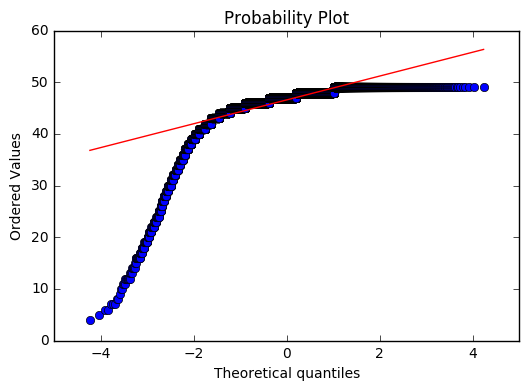

In [941]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

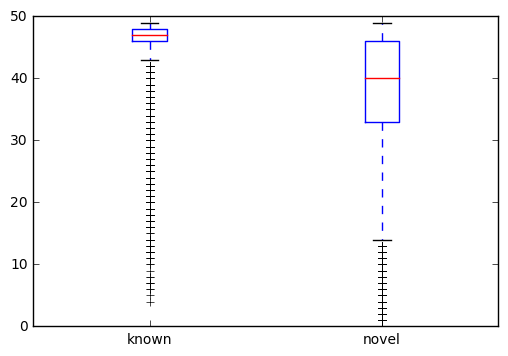

In [942]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

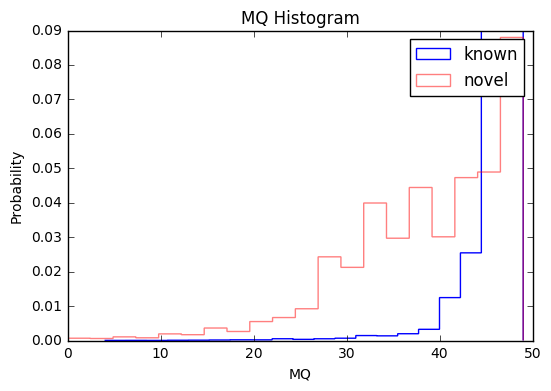

In [943]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQ Histogram")
plt.xlabel("MQ")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
Let's take the 1 percentile for MQ in the known set as the cutoff:

In [944]:
cutoff=np.percentile(good_set,1)
print(cutoff)

34.0


### Solving the skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12107d910>]], dtype=object)

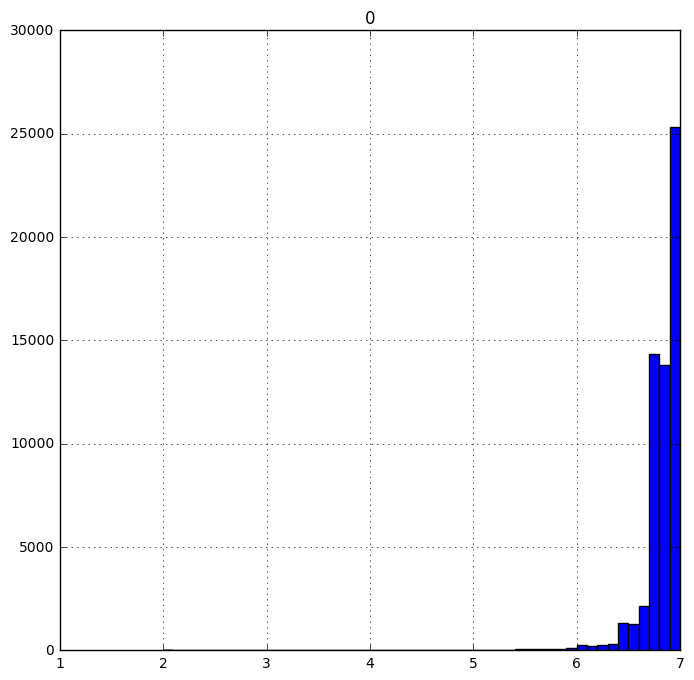

In [945]:
skewed = pd.DataFrame(good_set)   # Convert to DF

## square root transformation
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*
sqrt_transformed.hist(figsize=(8,8), bins=50)     # Plot histogram

Square root transformation does not work

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127853450>]], dtype=object)

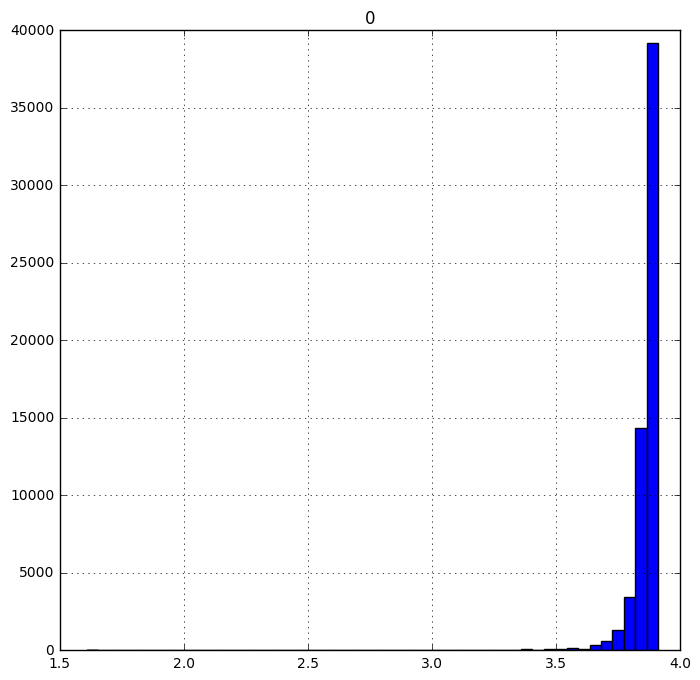

In [946]:
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data
log_transformed.hist(figsize = (8,8),bins=50)          # Plot histogram

Log transformation does not work

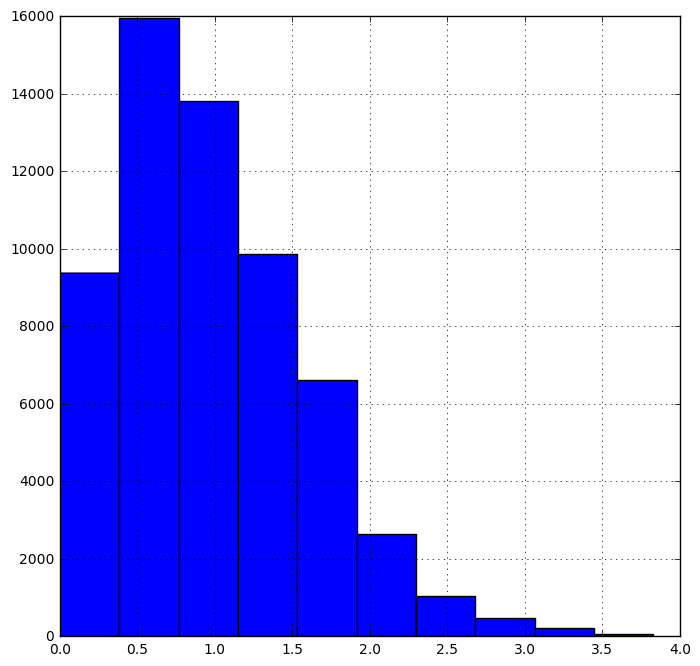

In [947]:
#data reflection:
constant=(max(skewed[0]))+1
skewed['reflected']=constant-skewed[0]

log_transformed_r = (skewed['reflected']).apply(np.log)
log_transformed_r.hist(figsize = (8,8))

In [948]:
out=stats.normaltest(log_transformed_r)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1278.02294807
P-value: 3.02581905591e-278


Data reflection and then log transformation does not work

## MQ0F
Fraction of MQ0 reads (smaller is better):

In [949]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/MQ0F.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/MQ0F.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [950]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.0020562048787
Avg Bad set: 0.0559794273124


### t-test

First, we check if variances are equal:

In [951]:
print(np.var(good_set))
print(np.var(bad_set))

0.000431597741713
0.0127210478257


And we perform the homogeinity of variances test:

In [952]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 12727.8779406
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [953]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-76.398778832140636, pvalue=0.0)

### Check for normality

In [954]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 122332.536794
P-value: 0.0


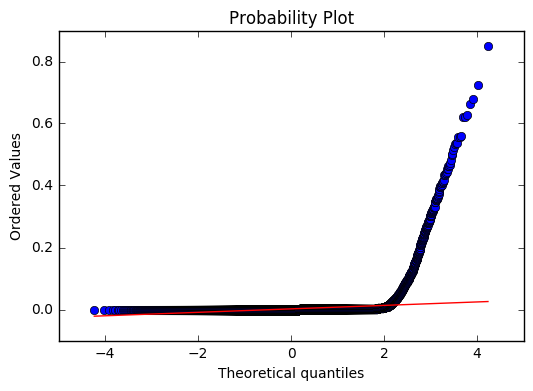

In [955]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

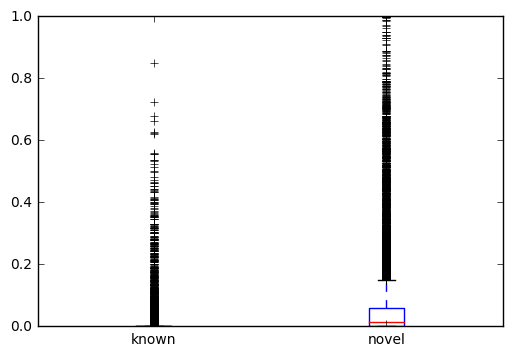

In [956]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

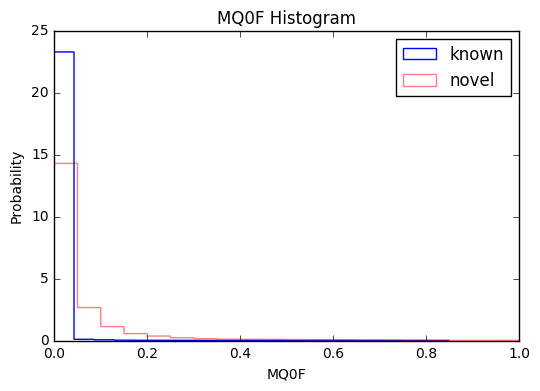

In [957]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQ0F Histogram")
plt.xlabel("MQ0F")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
Let's take the 99 percentile for MQ0F in the known set as the cutoff:

In [958]:
cutoff=np.percentile(good_set,99)
print(cutoff)

0.04973734


### Solving the skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126a20610>]], dtype=object)

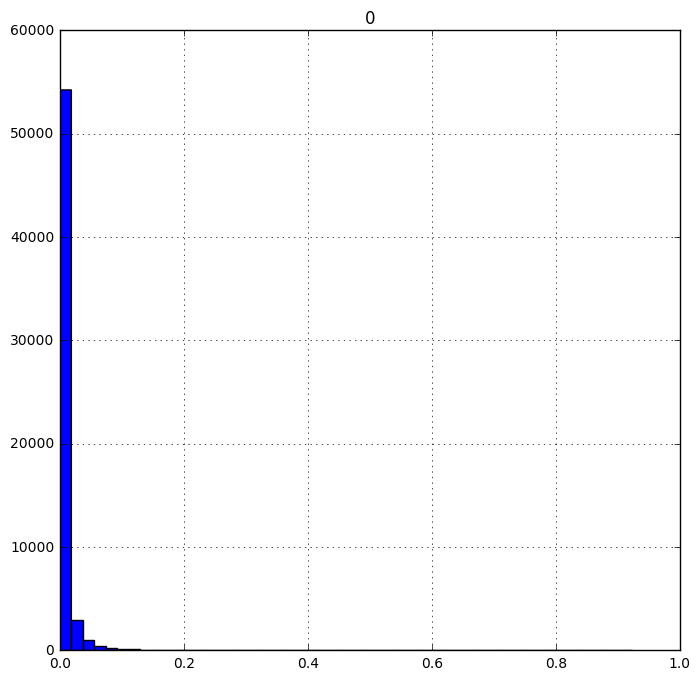

In [959]:
skewed = pd.DataFrame(good_set)   # Convert to DF

## square root transformation
sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*
sqrt_transformed.hist(figsize=(8,8), bins=50)     # Plot histogram

Square root transformation does not work

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212fa350>]], dtype=object)

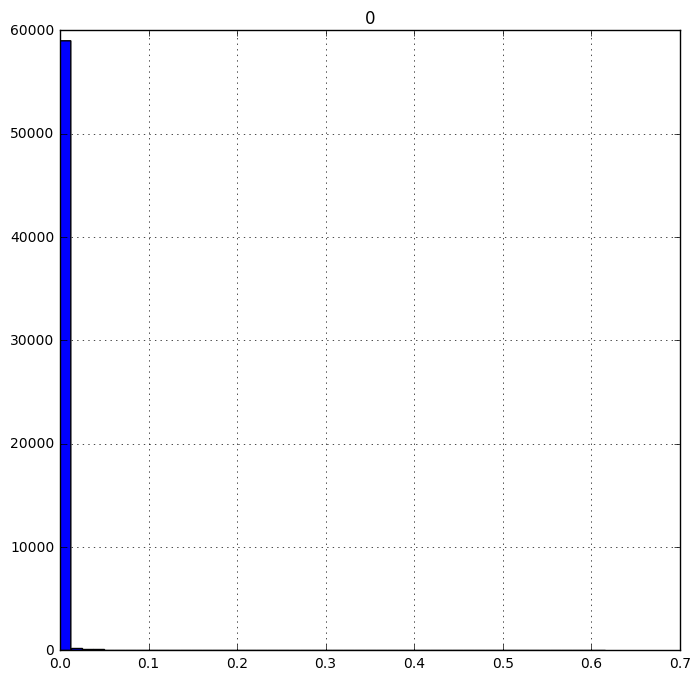

In [960]:
log_transformed = (skewed+1).apply(np.log)   # Get the log of the data
log_transformed.hist(figsize = (8,8),bins=50)          # Plot histogram

Log transformation does not work

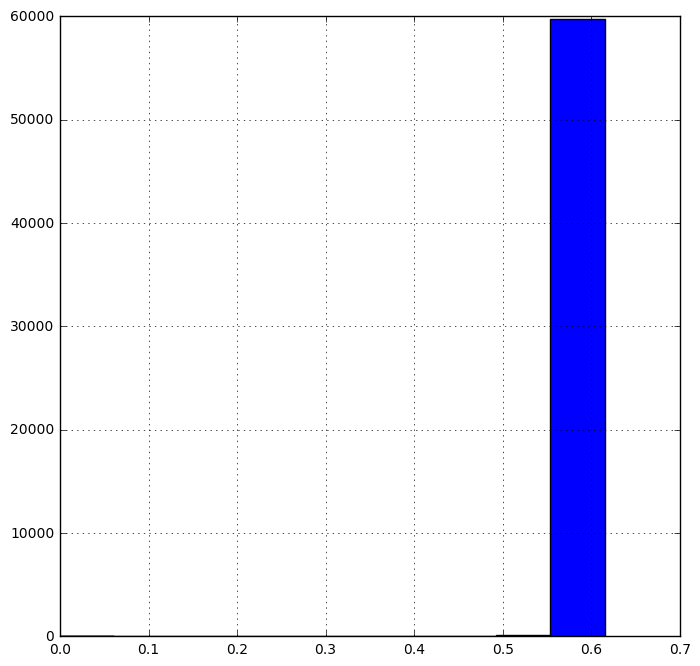

In [961]:
#data reflection:
constant=(max(skewed[0]))+1
skewed['reflected']=constant-skewed[0]

log_transformed_r = (skewed['reflected']).apply(np.log)
log_transformed_r.hist(figsize = (8,8))

In [962]:
out=stats.normaltest(log_transformed_r)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 128613.052175
P-value: 0.0


Data reflection and then log transformation does not work

## BQB
Mann-Whitney U test of Base Quality Bias (bigger is better)

In [963]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/BQB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/BQB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [964]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.0573747550654
Avg Bad set: 0.0462284857108


### t-test

First, we check if variances are equal:

In [965]:
print(np.var(good_set))
print(np.var(bad_set))

0.0374724074827
0.0305817078912


And we perform the homogeinity of variances test:

In [966]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 63.5187411582
P-value: 1.60780707822e-15


Variances are not equal, we set the t-test accordingly:

In [967]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=8.2974627514018042, pvalue=1.0878596251534704e-16)

### Check for normality

In [968]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 44620.7685887
P-value: 0.0


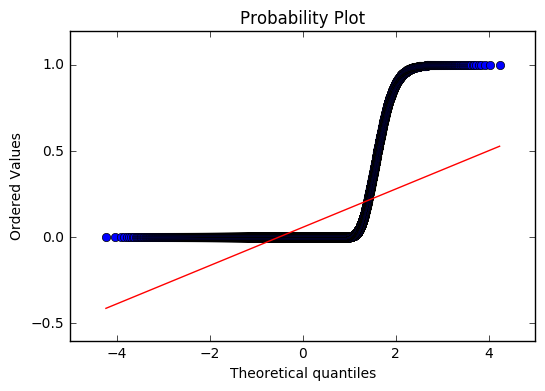

In [969]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

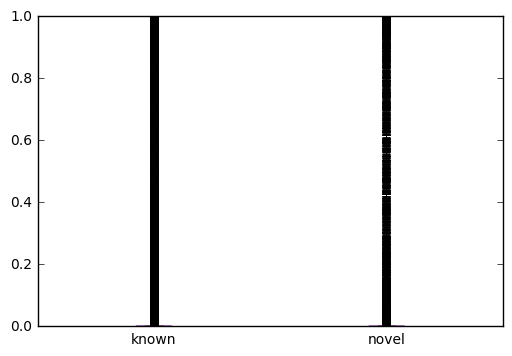

In [970]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

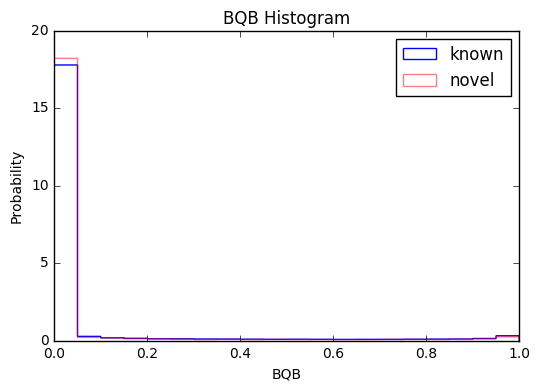

In [971]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("BQB Histogram")
plt.xlabel("BQB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion

*This annotation is not used in the filtering*

## HOB
Bias in the number of HOMs number (smaller is better)

In [972]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/HOB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/HOB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [973]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.0459343171995
Avg Bad set: 0.152200586069


### t-test

First, we check if variances are equal:

In [974]:
print(np.var(good_set))
print(np.var(bad_set))

0.00161894827809
0.02615881484


And we perform the homogeinity of variances test:

In [975]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 31108.5111482
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [976]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-104.11820251275654, pvalue=0.0)

### Check for normality

In [977]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 9135.00251895
P-value: 0.0


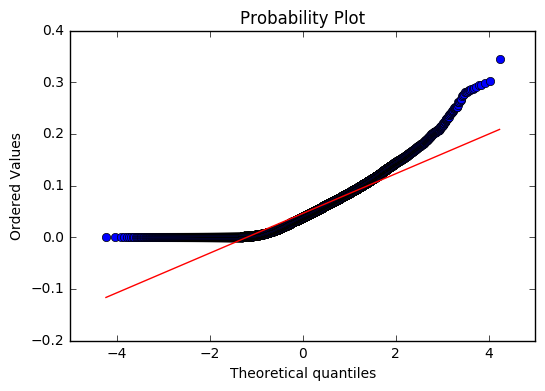

In [978]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

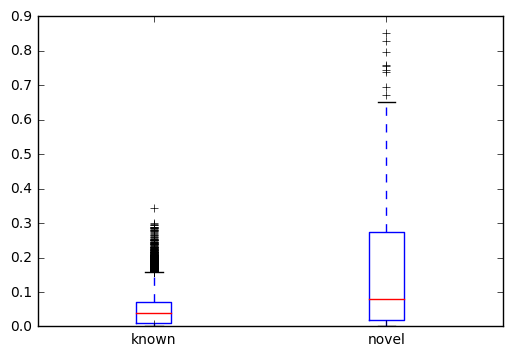

In [979]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

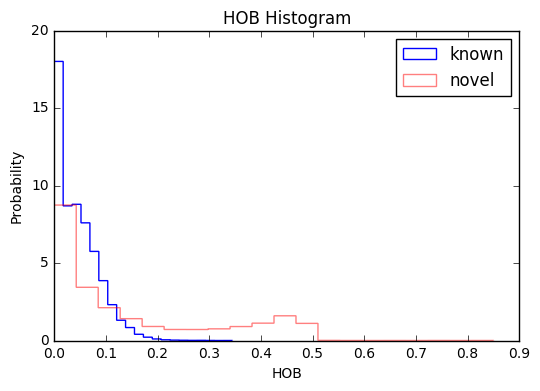

In [980]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("HOB Histogram")
plt.xlabel("HOB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
Let's take the 99 percentile for HOB in the known set as the cutoff:

In [981]:
cutoff=np.percentile(good_set,99)
print(cutoff)

0.1643732


## ICB
Inbreeding Coefficient Binomial test (bigger is better)

In [982]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/ICB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/ICB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [983]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.231197611068
Avg Bad set: 0.166190707544


### t-test

First, we check if variances are equal:

In [984]:
print(np.var(good_set))
print(np.var(bad_set))

0.137807156371
0.107755180455


And we perform the homogeinity of variances test:

In [985]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 591.618733228
P-value: 3.08934703229e-130


Variances are not equal, we set the t-test accordingly:

In [986]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=25.535711395156902, pvalue=5.449004650098905e-143)

### Check for normality

In [987]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 9830.3171933
P-value: 0.0


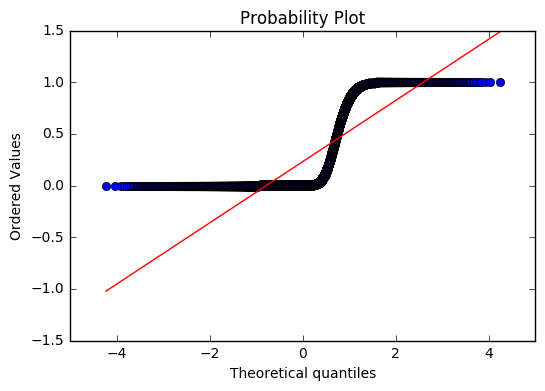

In [988]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

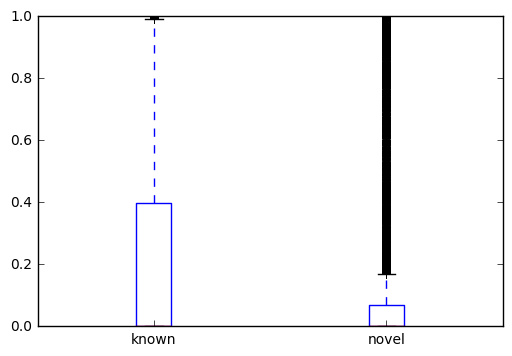

In [989]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

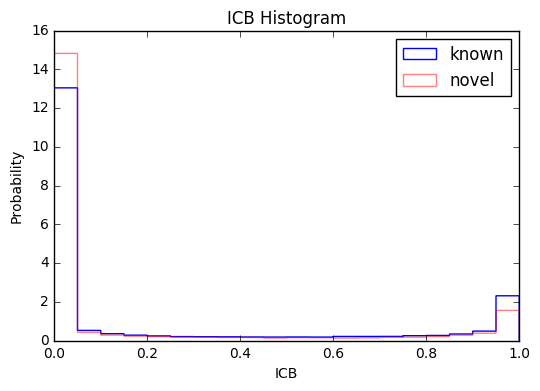

In [990]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("ICB Histogram")
plt.xlabel("ICB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
*This annotation is not used in the filtering*

## MQSB
Mann-Whitney U test of Mapping Quality vs Strand Bias (bigger is better)

In [991]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/MQSB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/MQSB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG MQSB for the good set (in GIAB) and the bad set (not in GIAB)

In [992]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.193300450279
Avg Bad set: 0.0973766351207


### t-test

First, we check if variances are equal:

In [993]:
print(np.var(good_set))
print(np.var(bad_set))

0.108101701729
0.0620905672951


And we perform the homogeinity of variances test:

In [994]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1767.65830232
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [995]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=46.832054334310335, pvalue=0.0)

### Check for normality

In [996]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 12622.2265222
P-value: 0.0


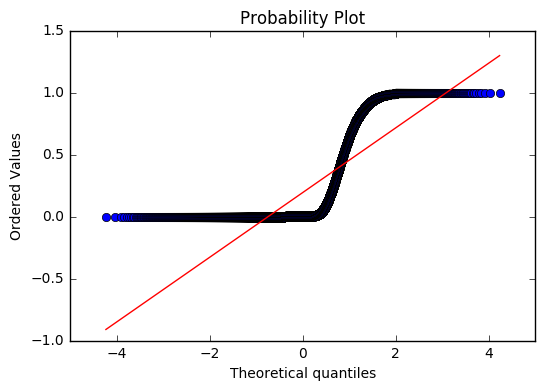

In [997]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

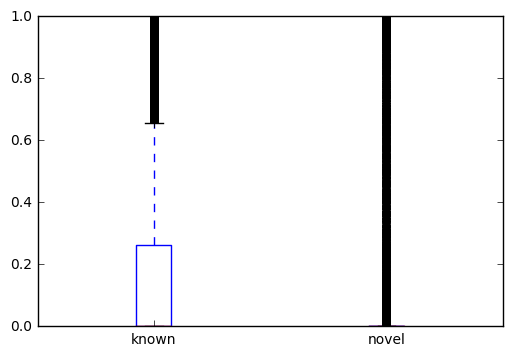

In [998]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

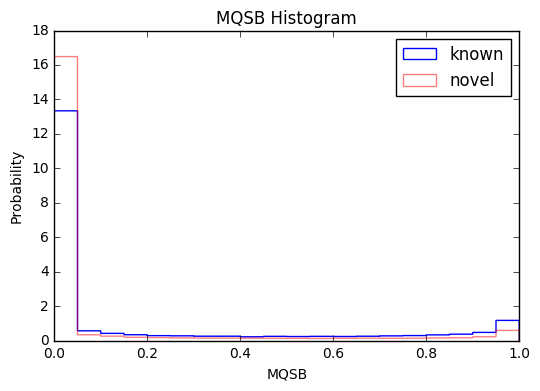

In [999]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQSB Histogram")
plt.xlabel("MQSB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
No apparent differences in the quality distribution between known/novel. This annoation will not be used in the filtering

## MQB
Mann-Whitney U test of Mapping Quality Bias (bigger is better)

In [1000]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/MQB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/MQB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1001]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.00223542892137
Avg Bad set: 0.00832656139969


### t-test

First, we check if variances are equal:

In [1002]:
print(np.var(good_set))
print(np.var(bad_set))

0.00161908075723
0.00591940015648


And we perform the homogeinity of variances test:

In [1003]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 230.402154103
P-value: 5.69023533765e-52


Variances are not equal, we set the t-test accordingly:

In [1004]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-12.049775023379107, pvalue=2.2950527672290783e-33)

### Check for normality

In [1005]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 133234.19636
P-value: 0.0


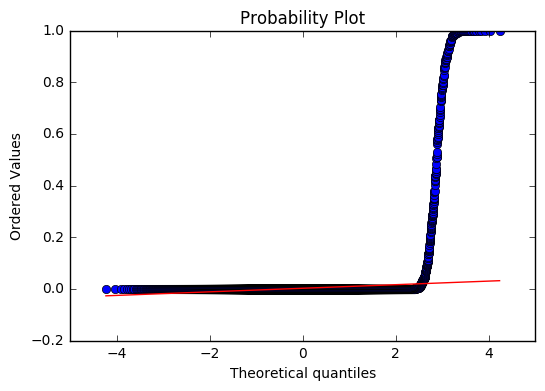

In [1006]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

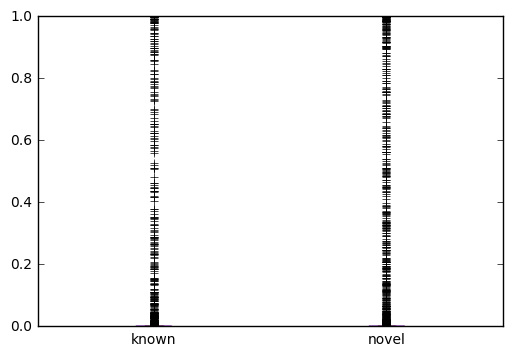

In [1007]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

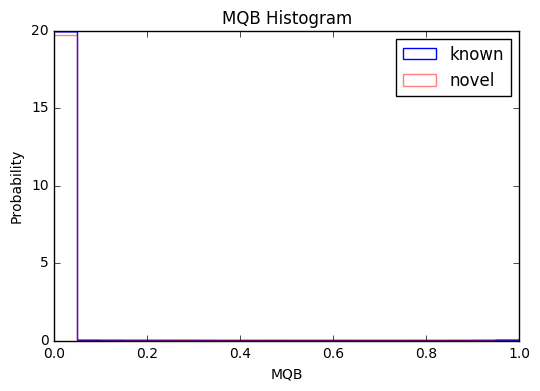

In [1008]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQB Histogram")
plt.xlabel("MQB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
No apparent differences in the quality distribution between known/novel. This annotation will not be used in the filtering

## RPB
Mann-Whitney U test of Read Position Bias (bigger is better)

In [1009]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/RPB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/RPB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1010]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.531099579565
Avg Bad set: 0.197538204337


### t-test

First, we check if variances are equal:

In [1011]:
print(np.var(good_set))
print(np.var(bad_set))

0.129537074114
0.111401999848


And we perform the homogeinity of variances test:

In [1012]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 5391.70030873
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [1013]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=131.26217467117993, pvalue=0.0)

### Check for normality

In [1014]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 282.868764911
P-value: 3.76554765455e-62


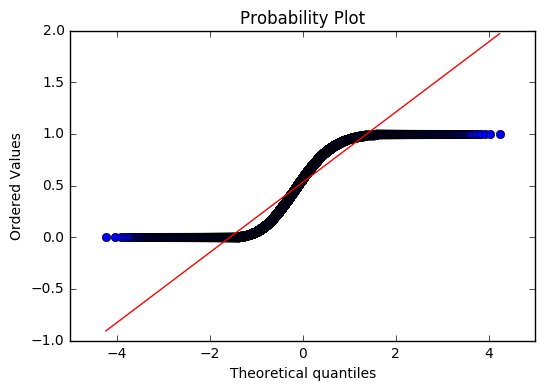

In [1015]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

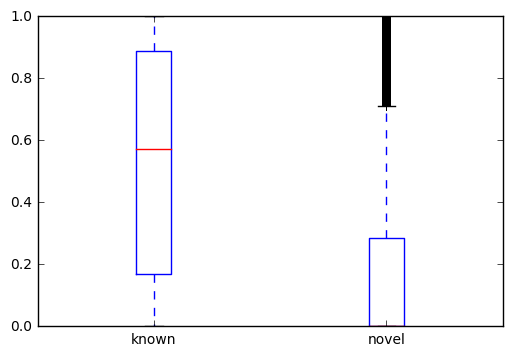

In [1016]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

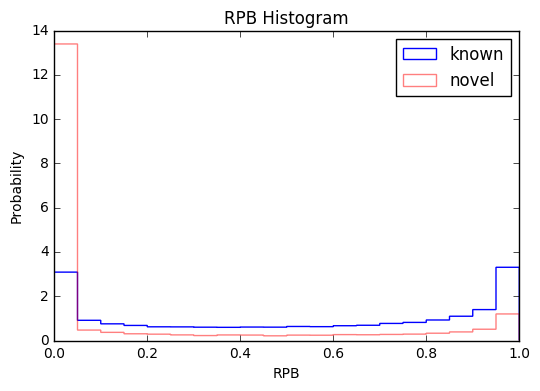

In [1017]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("RPB Histogram")
plt.xlabel("RPB")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
No apparent differences in the quality distribution between known/novel. This annotation will not be used in the filtering

## SGB
Segregation based metric

In [1018]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/SGB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/SGB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1019]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 724.341098247
Avg Bad set: -5566.55694443


### t-test

First, we check if variances are equal:

In [1020]:
print(np.var(good_set))
print(np.var(bad_set))

594584.642605
330630592.183


And we perform the homogeinity of variances test:

In [1021]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 6122.76695142
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [1022]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=55.667044027117065, pvalue=0.0)

### Check for normality

In [1023]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 39.4365116775
P-value: 2.73193458707e-09


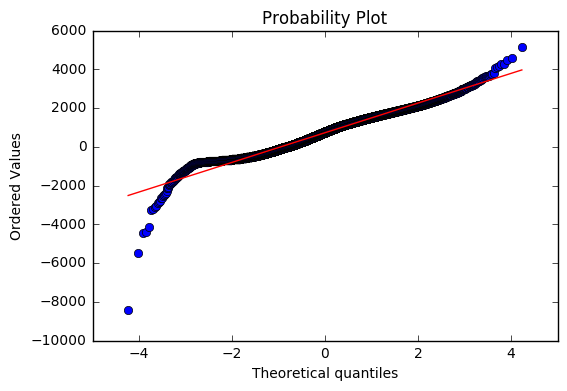

In [1024]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

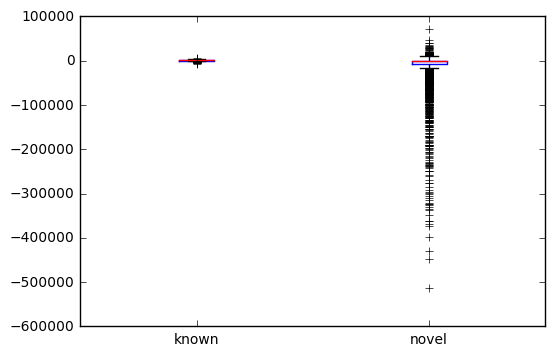

In [1025]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

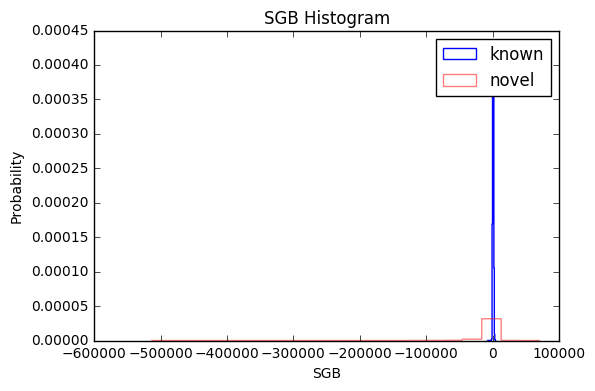

In [1026]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("SGB Histogram")
plt.xlabel("SGB")
plt.ylabel("Probability")
plt.legend()
plt.show()


A double filter is going to be used, for variants in the Novel set having SGB> than the max of Known SGB
and variants in the Novel set having SGB< than the min of Known SGB

### Conclusion
Let's take the 1 and 99 percentile in the known set as the cutoff:

In [1027]:
cutoff_upper=np.percentile(good_set,99)
cutoff_lower=np.percentile(bad_set,1)
print(cutoff_upper)
print(cutoff_lower)

2347.043
-64440.286


## GT_DP
Format: Number of high-quality bases

In [1028]:
good_set=None
bad_set=None
good_set=np.fromfile(snps_folder+"/GT_DP.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(snps_folder+"/GT_DP.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1029]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 4.61717917998
Avg Bad set: 8.40405248939


### t-test

First, we check if variances are equal:

In [1030]:
print(np.var(good_set))
print(np.var(bad_set))

4.81833772988
63.5991113272


And we perform the homogeinity of variances test:

In [1031]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 11910.2274237
P-value: 0.0


Variances are not equal, we set the t-test accordingly:

In [1032]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-75.214440810437296, pvalue=0.0)

### Check for normality

In [1033]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 3399.71202538
P-value: 0.0


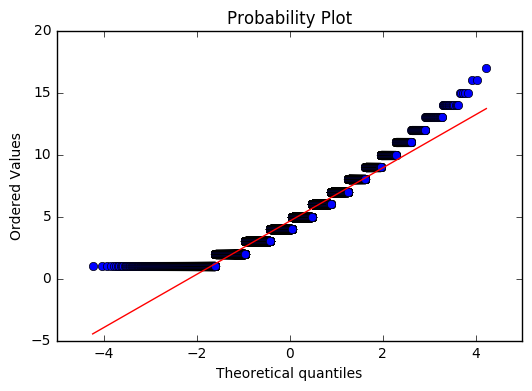

In [1034]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

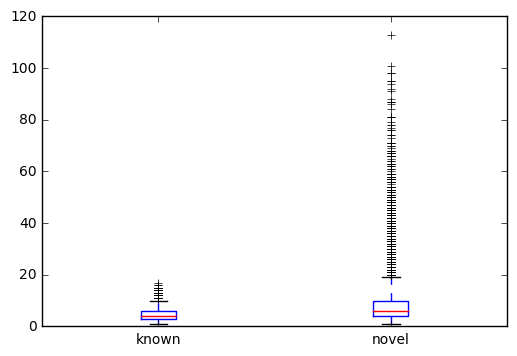

In [1035]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

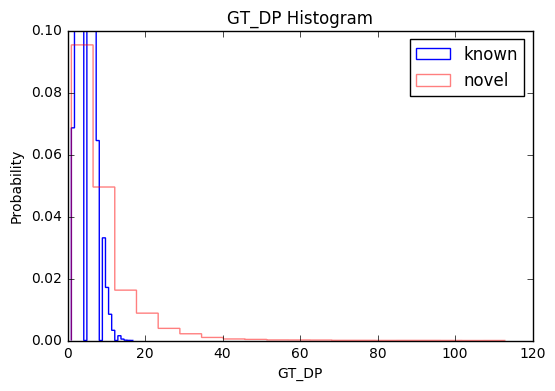

In [1036]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("GT_DP Histogram")
plt.xlabel("GT_DP")
plt.ylabel("Probability")
plt.legend()
plt.show()


### Conclusion
Let's take the 99 percentile in the known set as the cutoff:

In [1037]:
cutoff=np.percentile(good_set,99)
print(cutoff)

11.0


# INDELS

On this notebook, I am going to analyze the difference between distribution of different annotations between a good and a bad vcf

## QUAL

First thing, is to load all dependencies:

In [1038]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.mlab as mlab

%matplotlib inline

indels_folder="/Users/ernesto/projects/IGSR/11_04_17/LCOVERAGE/INDELS/"

Then, we read-in the data:

In [1039]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/quals.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/quals.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1040]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 985.587887992
Avg Bad set: 978.111633241


### t-test

First, we check if variances are equal:

In [1041]:
print(np.var(good_set))
print(np.var(bad_set))

9336.20815815
14451.1274751


And we perform the homogeinity of variances test:

In [1042]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 16.2358773441
P-value: 5.61666972017e-05


Variances are not equal, we set the t-test accordingly:

In [1043]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=4.3544683799342598, pvalue=1.344045263574851e-05)

### Check for normality

In [1044]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 7343.63266061
P-value: 0.0


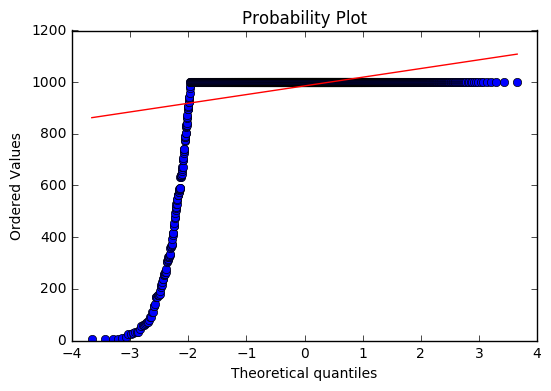

In [1045]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

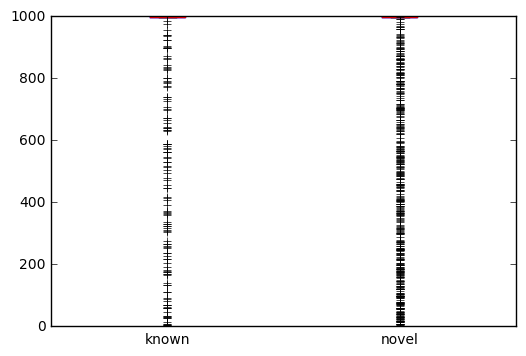

In [1046]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

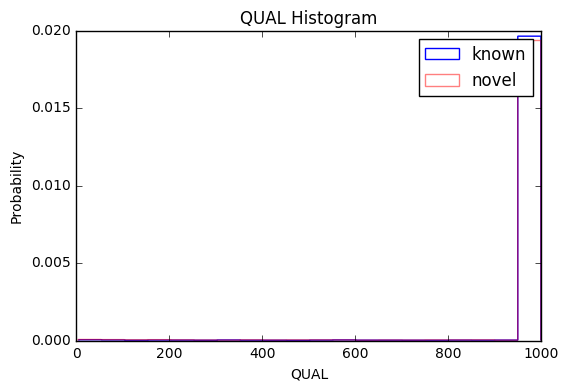

In [1047]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("QUAL Histogram")
plt.xlabel("QUAL")
plt.ylabel("Probability")
plt.legend()
plt.show()

We see a huge peak of INDELs having a quality of 999.
Let's adjust the range for not displaying this big peak

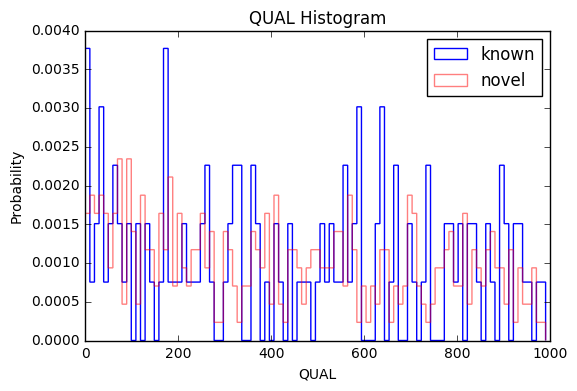

In [1048]:
plt.hist(good_set, bins=100, histtype='step', normed=True, color='b', label='known',range=[0,990])
plt.hist(bad_set, bins=100, histtype='step', normed=True, color='r', alpha=0.5, label='novel',range=[0,990])
plt.title("QUAL Histogram")
plt.xlabel("QUAL")
plt.ylabel("Probability")
plt.legend()
plt.show()



### Conclusion
No apparent differences in the quality distribution between known/novel. This annoation will not be used in the filtering

## DP
Info FIELD. Raw read depth

In [1049]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/DP.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/DP.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1050]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 17714.8217026
Avg Bad set: 24803.7796683


### t-test

First, we check if variances are equal:

In [1051]:
print(np.var(good_set))
print(np.var(bad_set))

9633339.9905
2226938584.78


And we perform the homogeinity of variances test:

In [1052]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 288.185728134
P-value: 4.13705837104e-64


Variances are not equal, we set the t-test accordingly:

In [1053]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-16.130289377603287, pvalue=6.456759698421276e-58)

### Check for normality

In [1054]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 485.743988139
P-value: 3.32684959264e-106


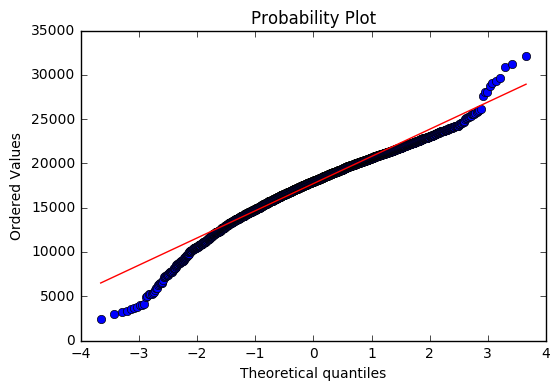

In [1055]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

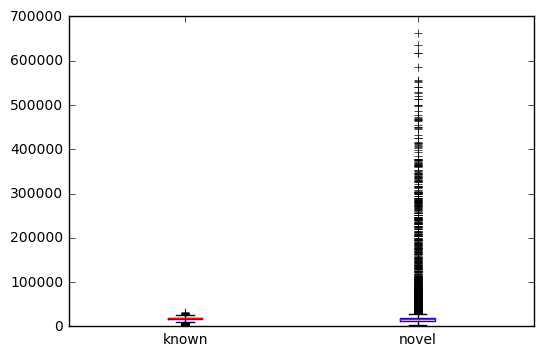

In [1056]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

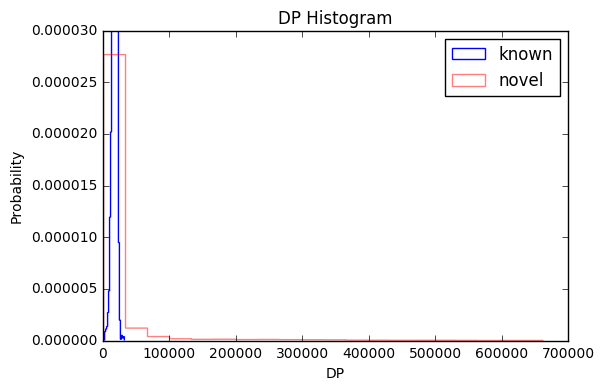

In [1057]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("DP Histogram")
plt.xlabel("DP")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 99 percentile DP in the known set as the cutoff:

In [1058]:
cutoff=np.percentile(good_set,99)
print(cutoff)

23862.24


## MQ

RMS Mapping Quality

In [1059]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/MQ.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/MQ.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1060]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 48.4210814761
Avg Bad set: 45.6672681963


### t-test

First, we check if variances are equal:

In [1061]:
print(np.var(good_set))
print(np.var(bad_set))

3.16375725204
25.8153873383


And we perform the homogeinity of variances test:

In [1062]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1462.49440784
P-value: 4.04177955085e-307


Variances are not equal, we set the t-test accordingly:

In [1063]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=52.073381006052117, pvalue=0.0)

### Check for normality

In [1064]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 7600.52633488
P-value: 0.0


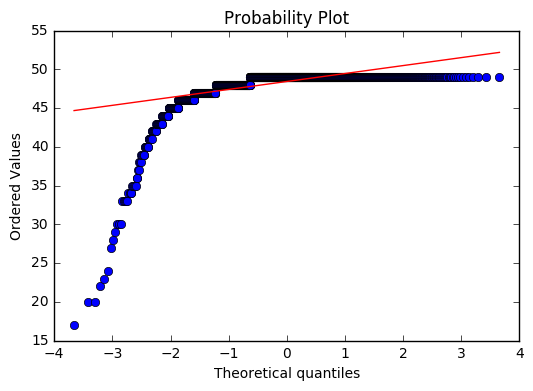

In [1065]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

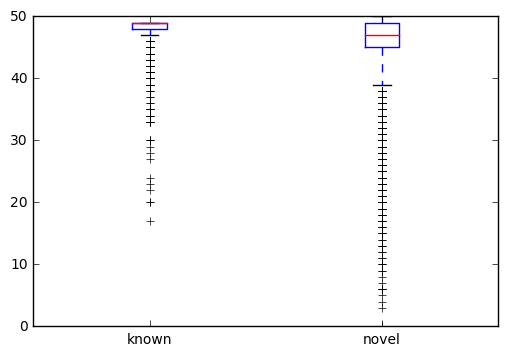

In [1066]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

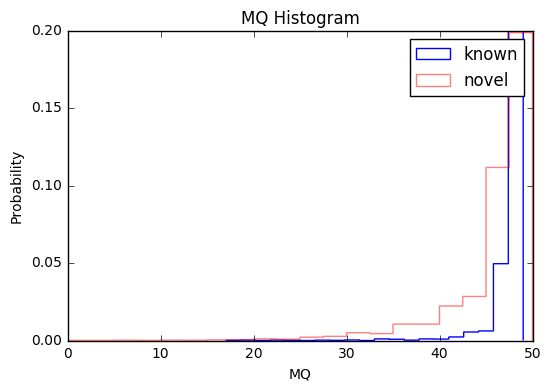

In [1067]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQ Histogram")
plt.xlabel("MQ")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion

Let's take the 1 percentile for MQ in the known set as the cutoff:

In [1068]:
cutoff=np.percentile(good_set,1)
print(cutoff)

41.73


## MQ0F
Fraction of MQ0 reads (smaller is better):

In [1069]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/MQ0F.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/MQ0F.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1070]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.000862493129284
Avg Bad set: 0.0176009490125


### t-test

First, we check if variances are equal:

In [1071]:
print(np.var(good_set))
print(np.var(bad_set))

8.37962277923e-05
0.0040875710264


And we perform the homogeinity of variances test:

In [1072]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 362.477148726
P-value: 5.45693491175e-80


Variances are not equal, we set the t-test accordingly:

In [1073]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-27.645259467664641, pvalue=2.2181647265444207e-163)

### Check for normality

In [1074]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 11872.2870534
P-value: 0.0


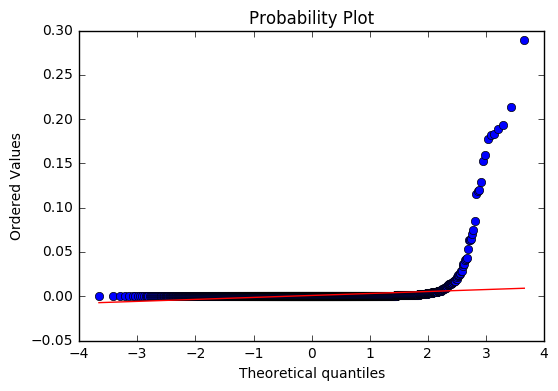

In [1075]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

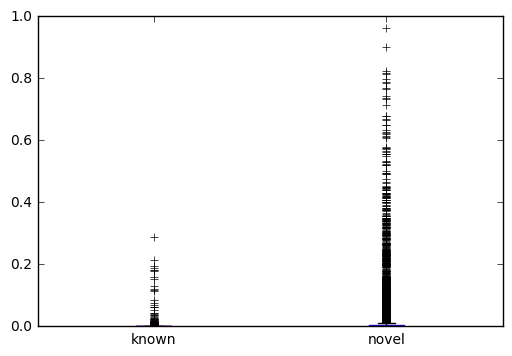

In [1076]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

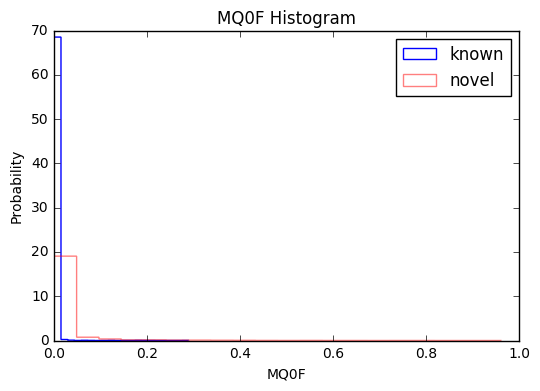

In [1077]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQ0F Histogram")
plt.xlabel("MQ0F")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 99 percentile for MQ0F in the known set as the cutoff:

In [1078]:
cutoff=np.percentile(good_set,99)
print(cutoff)

0.01032217


## HOB
Bias in the number of HOMs number (smaller is better)

In [1079]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/HOB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/HOB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1080]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.0590390913763
Avg Bad set: 0.108569416307


### t-test

First, we check if variances are equal:

In [1081]:
print(np.var(good_set))
print(np.var(bad_set))

0.00259575521402
0.0154413307517


And we perform the homogeinity of variances test:

In [1082]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 941.699603065
P-value: 3.15973299955e-201


Variances are not equal, we set the t-test accordingly:

In [1083]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=-36.468592103708403, pvalue=3.9988723563220031e-280)

### Check for normality

In [1084]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1039.02666557
P-value: 2.38905582063e-226


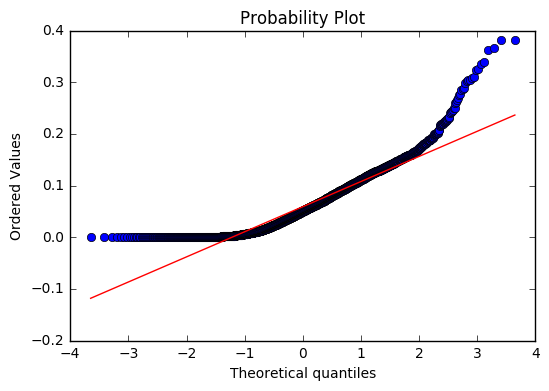

In [1085]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

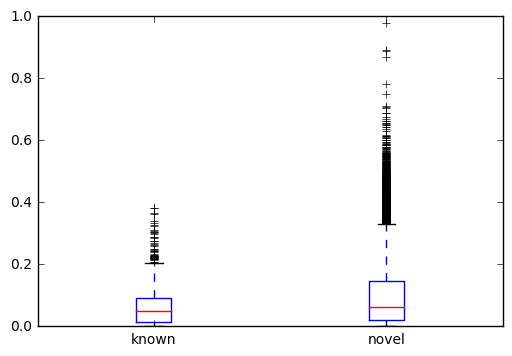

In [1086]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

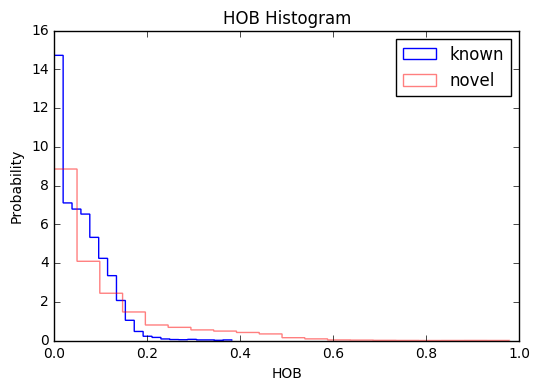

In [1087]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("HOB Histogram")
plt.xlabel("HOB")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 99 percentile for MQ0F in the known set as the cutoff:

In [1088]:
cutoff=np.percentile(good_set,99)
print(cutoff)

0.20266527


## ICB
Inbreeding Coefficient Binomial test (bigger is better)

In [1089]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/ICB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/ICB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1090]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.19366461475
Avg Bad set: 0.156876158568


### t-test

First, we check if variances are equal:

In [1091]:
print(np.var(good_set))
print(np.var(bad_set))

0.120965570207
0.0947328060688


And we perform the homogeinity of variances test:

In [1092]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 47.3630147197
P-value: 6.10827020474e-12


Variances are not equal, we set the t-test accordingly:

In [1093]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=6.579881554783424, pvalue=4.9648827609396836e-11)

### Check for normality

In [1094]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1158.01097013
P-value: 3.47626474261e-252


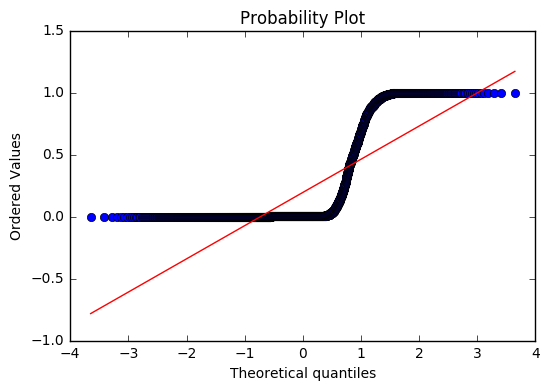

In [1095]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

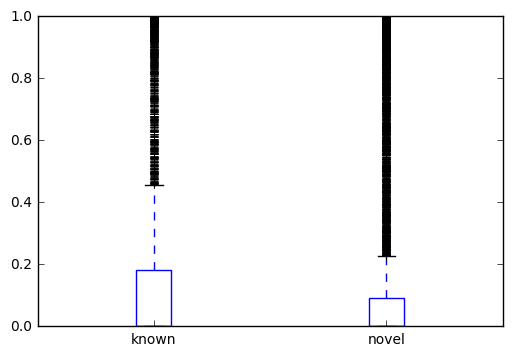

In [1096]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

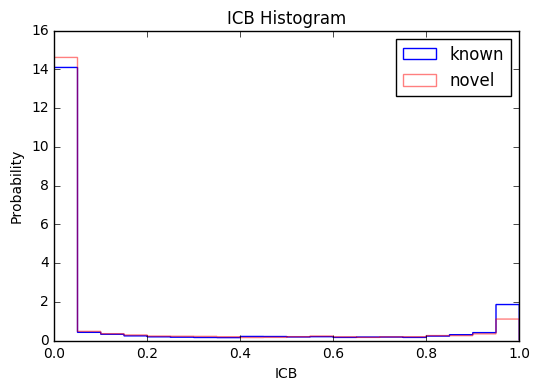

In [1097]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("ICB Histogram")
plt.xlabel("ICB")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
This cutoff will be not used. No difference between the means for the Known and Novel callsets

## MQSB
Mann-Whitney U test of Mapping Quality vs Strand Bias (bigger is better)

In [1098]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/MQSB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/MQSB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1099]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.487754058001
Avg Bad set: 0.253102952452


### t-test

First, we check if variances are equal:

In [1100]:
print(np.var(good_set))
print(np.var(bad_set))

0.173496708926
0.132847392072


And we perform the homogeinity of variances test:

In [1101]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 735.917670202
P-value: 1.03782930677e-158


Variances are not equal, we set the t-test accordingly:

In [1102]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=35.734799459637856, pvalue=1.3530339497243755e-262)

### Check for normality

In [1103]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1.31642872358
P-value: 0.517775068466


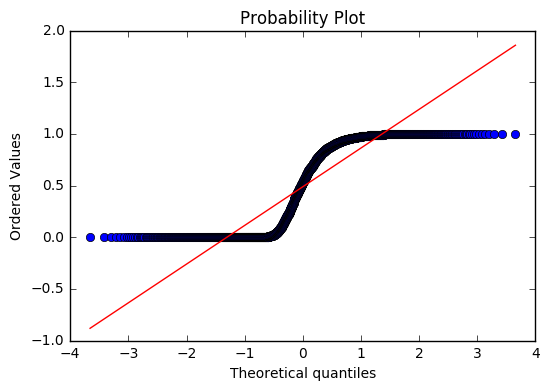

In [1104]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

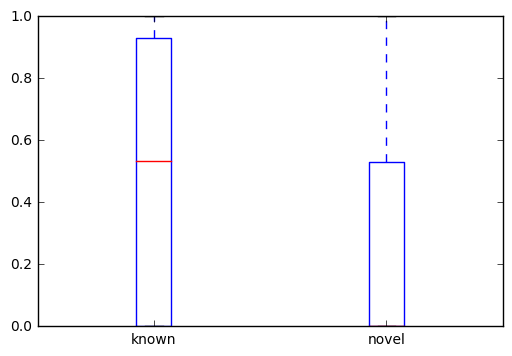

In [1105]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

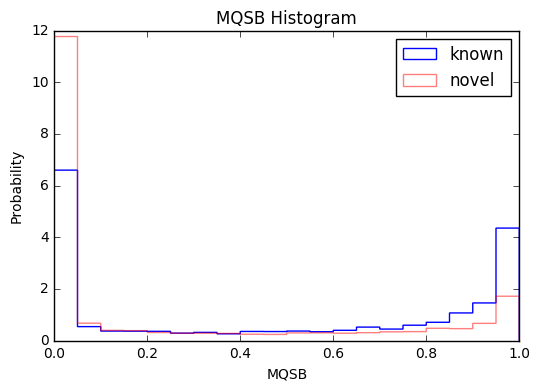

In [1106]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("MQSB Histogram")
plt.xlabel("MQSB")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
No apparent differences in the quality distribution between known/novel. This annotation will not be used in the filtering

## SGB
Segregation based metric

In [1107]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/SGB.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/SGB.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1108]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 435.281872058
Avg Bad set: -1106.82764407


### t-test

First, we check if variances are equal:

In [1109]:
print(np.var(good_set))
print(np.var(bad_set))

548937.912779
40842400.9438


And we perform the homogeinity of variances test:

In [1110]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 113.411629026
P-value: 2.12096633827e-26


Variances are equal, we set the t-test accordingly:

In [1111]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=True)

Ttest_indResult(statistic=17.795821816844438, pvalue=3.2682552948061496e-70)

### Check for normality

In [1112]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 192.258562915
P-value: 1.78477516303e-42


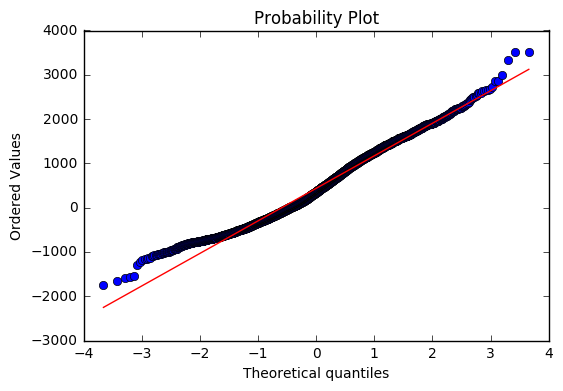

In [1113]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

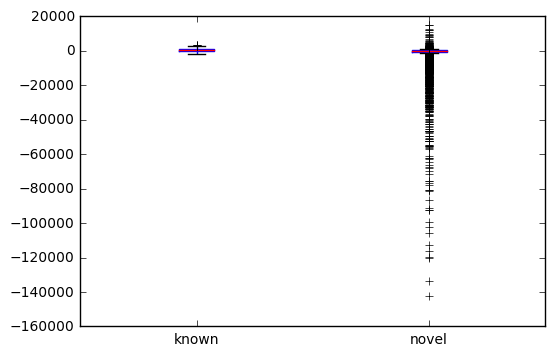

In [1114]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

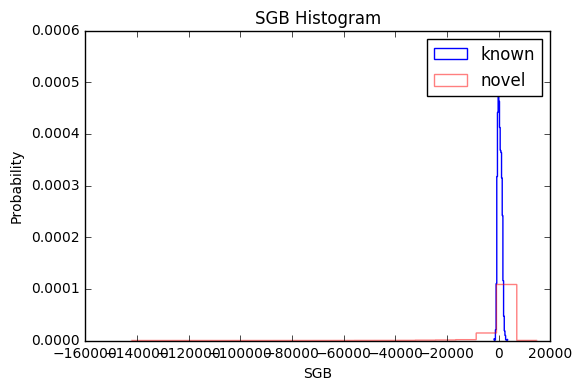

In [1115]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("SGB Histogram")
plt.xlabel("SGB")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 1 and 99 percentile in the known set as the cutoff:

In [1116]:
cutoff_upper=np.percentile(good_set,99)
cutoff_lower=np.percentile(bad_set,1)
print(cutoff_upper)
print(cutoff_lower)

2156.1294
-28957.772


## GT_DP
Format: Number of high-quality bases

In [1117]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/GT_DP.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/GT_DP.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1118]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 4.21392035075
Avg Bad set: 3.74125633754


### t-test

First, we check if variances are equal:

In [1119]:
print(np.var(good_set))
print(np.var(bad_set))

4.45241126585
14.3586768783


And we perform the homogeinity of variances test:

In [1120]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 108.219011706
P-value: 2.86269879985e-25


Variances are not equal, we set the t-test accordingly:

In [1121]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=10.445746611893655, pvalue=1.8369473835910087e-25)

### Check for normality

In [1122]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 337.406597149
P-value: 5.40864341821e-74


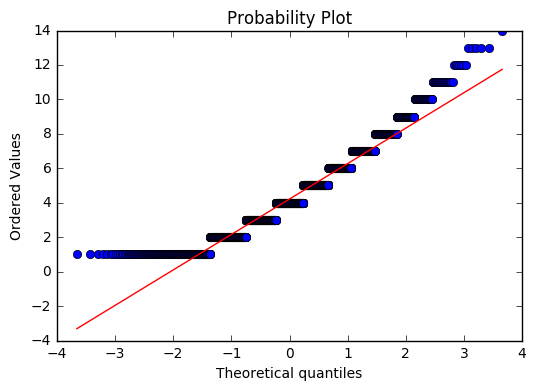

In [1123]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

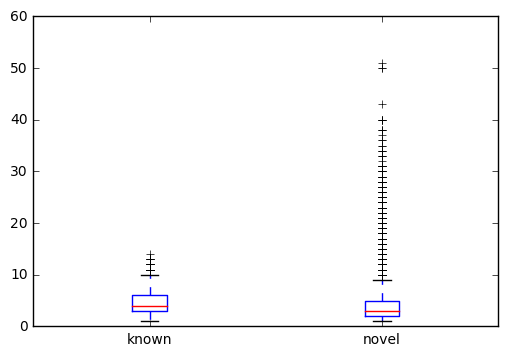

In [1124]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

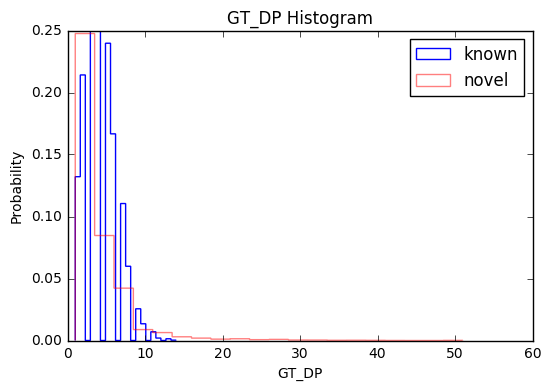

In [1125]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("GT_DP Histogram")
plt.xlabel("GT_DP")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 99 percentile in the known set as the cutoff:

In [1126]:
cutoff=np.percentile(good_set,99)
print(cutoff)

10.0


## IDV
Maximum number of reads supporting an indel

In [1127]:
good_set=None
bad_set=None
good_set=np.fromfile(indels_folder+"/IDV.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/IDV.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1128]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 24.5664961637
Avg Bad set: 17.2107931597


### t-test

First, we check if variances are equal:

In [1129]:
print(np.var(good_set))
print(np.var(bad_set))

125.000053964
768.886132541


And we perform the homogeinity of variances test:

In [1130]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 69.2416224909
P-value: 9.3601662839e-17


Variances are not equal, we set the t-test accordingly:

In [1131]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=24.667791578802213, pvalue=5.2377466935407834e-132)

### Check for normality

In [1132]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 4706.79105514
P-value: 0.0


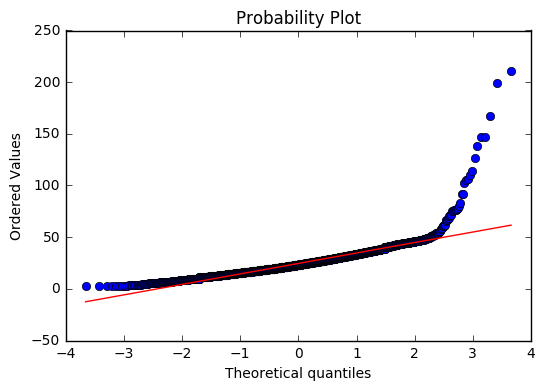

In [1133]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

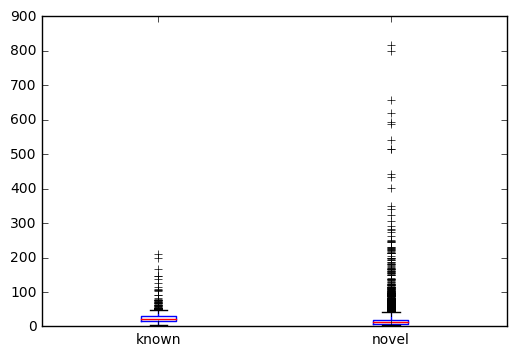

In [1134]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

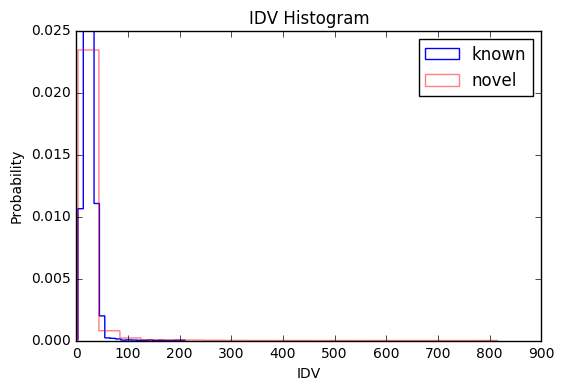

In [1135]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("IDV Histogram")
plt.xlabel("IDV")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 99 percentile in the known set as the cutoff:

In [1136]:
cutoff=np.percentile(good_set,99)
print(cutoff)

52.0


## IMF
Maximum fraction of reads supporting an indel

In [1137]:
good_set=np.fromfile(indels_folder+"/IMF.good.corr.txt",dtype=float,sep="\n")
bad_set=np.fromfile(indels_folder+"/IMF.bad.corr.txt",dtype=float,sep="\n")

And we calulate the AVG values for the good set (in GIAB) and the bad set (not in GIAB)

In [1138]:
print "Avg Good set: {0}".format(np.mean(good_set))
print "Avg Bad set: {0}".format(np.mean(bad_set))

Avg Good set: 0.83976503471
Avg Bad set: 0.583155802569


### t-test

First, we check if variances are equal:

In [1139]:
print(np.var(good_set))
print(np.var(bad_set))

0.0244403871885
0.0536299016205


And we perform the homogeinity of variances test:

In [1140]:
out=stats.levene(good_set,bad_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1495.97864052
P-value: 8.1220403777e-314


Variances are not equal, we set the t-test accordingly:

In [1141]:
stats.ttest_ind(a=good_set,b=bad_set,equal_var=False)

Ttest_indResult(statistic=85.184133053768804, pvalue=0.0)

### Check for normality

In [1142]:
#normality test
out=stats.normaltest(good_set)
print("Z-score: {0}".format(out[0]))
print("P-value: {0}".format(out[1]))

Z-score: 1046.82532771
P-value: 4.83914158704e-228


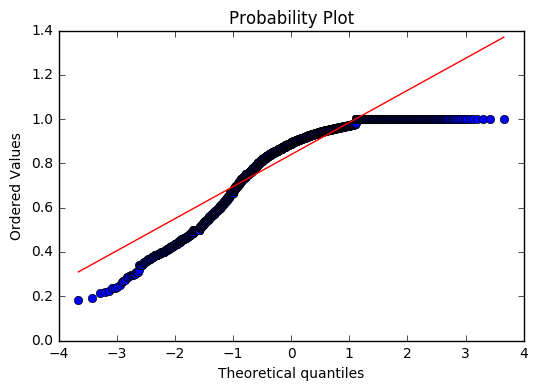

In [1143]:
#Q-Q plot
stats.probplot(good_set, dist="norm", plot=pylab)
pylab.show()

### Boxplots
Now, let's examine the 2 sets by creating a couple of boxplots

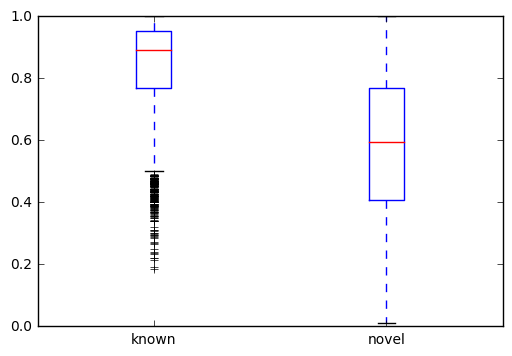

In [1144]:
data=[good_set,bad_set]

bp=plt.boxplot(data,labels=['known','novel'])

### Plots
Now, we check the distribution of known and novel with a histogram

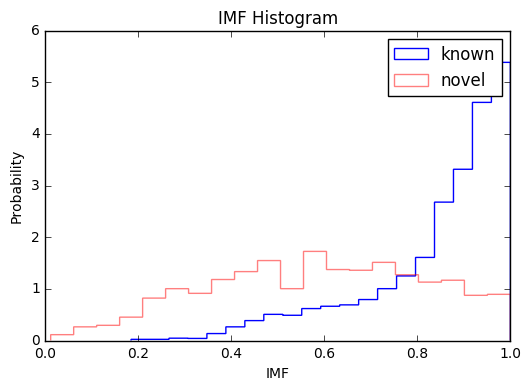

In [1145]:
plt.hist(good_set, bins=20, histtype='step', normed=True, color='b', label='known')
plt.hist(bad_set, bins=20, histtype='step', normed=True, color='r', alpha=0.5, label='novel')
plt.title("IMF Histogram")
plt.xlabel("IMF")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Conclusion
Let's take the 1 percentile in the known set as the cutoff:

In [1146]:
cutoff=np.percentile(good_set,1)
print(cutoff)

0.387097
